# Imports

In [2]:
import random

import importlib

import transformations as trans; importlib.reload(trans)
import visualisiations as vis; importlib.reload(vis)
import basic_models; importlib.reload(basic_models)

<module 'basic_models' from 'C:\\Users\\alons\\PycharmProjects\\machine_lerning\\Machine_Learning_Project\\basic_models.py'>

In [3]:
X_train, X_test, y_train, y_test = basic_models.load_preprocess_mnist_data(scale_features=False, flatten_image=False, use_pca=False)

# Transformations Tests

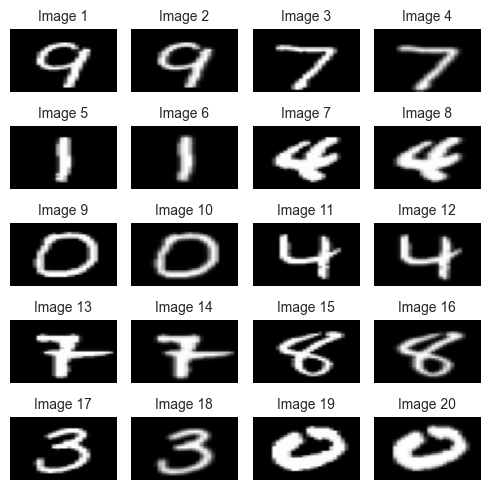

In [4]:
sample_space = X_test[:100]
images = random.sample(list(sample_space), 10)
vis.plot_before_after_transform(images, trans.center_image)

C:\Users\alons\PycharmProjects\machine_lerning\Machine_Learning_Project\visualisiations.py:65: UserWarning: Glyph 8736 (\N{ANGLE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Program Files\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8736 (\N{ANGLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


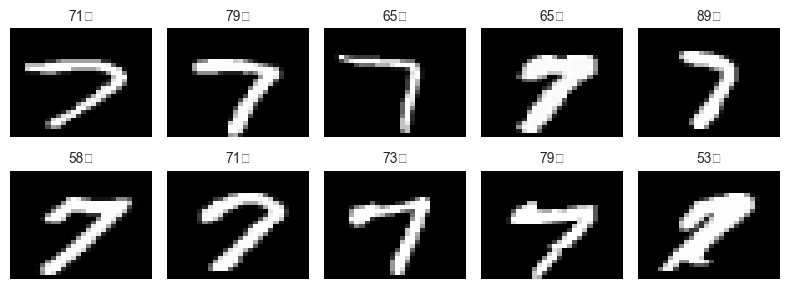

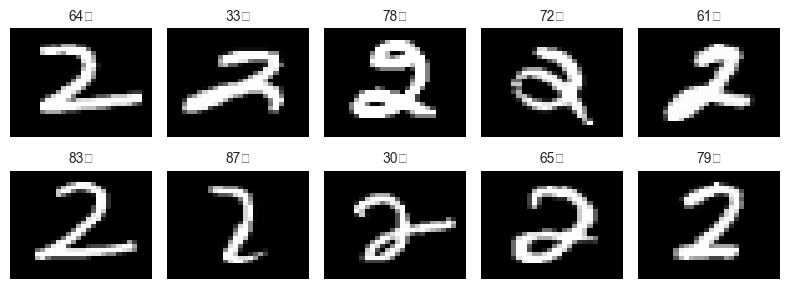

In [5]:
# get the train images of '9'
sample_space = list(X_train[y_train == 7])
images = random.sample(sample_space, 10)
vis.plot_images_with_tilt_angles(images, 5, figsize=(8, 3))

sample_space = list(X_train[y_train == 2])
images = random.sample(sample_space, 10)
vis.plot_images_with_tilt_angles(images, 5, figsize=(8, 3))

##### is the deskewing function functioning? - NO.

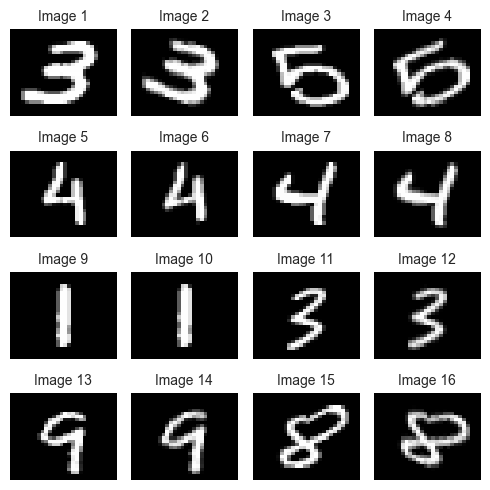

In [6]:
image_list = random.sample(list(X_train), 8)
vis.plot_before_after_transform(image_list, trans.deskew_image)

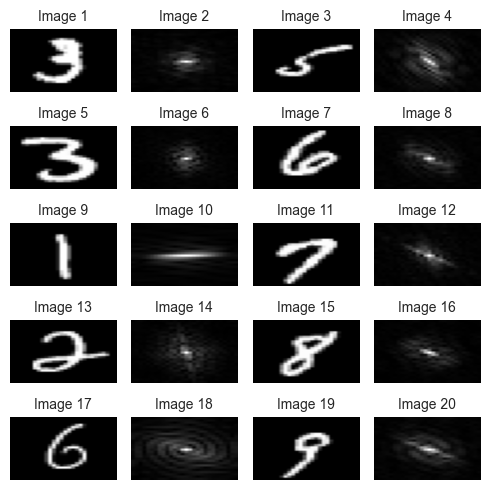

In [10]:
from transformations import fourier_transform_features
vis.plot_before_after_transform(X_train[10:20],transformation=fourier_transform_features)

